# INTRODUCCIÓN

El departamento analítico de Y.Afisha requiere una optimización en los gastos de marketing, por lo que se deberá preparar los datos, hacer el informe y calcular las métricas para concluir en que fuentes conviene invertir.

Se tiene a disposición 3 data frame, uno con las visitas al sitio web, el segundo con los datos sobre los pedidos, y por último un data frame con los datos sobre los gastos de marketing. Estos se trabajarán para poder calcular las métricas que se usarán para finalmente obtener una conclusión.

# TABLA DE CONTENIDO

# 1. Descarga y preparación de datos
# 2. Informes y métricas
# 3. Conclusión

In [8]:
#importando los paquetes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DESCARGA Y PREPARACIÓN DE DATOS

En esta sección se les asignará una variable a cada dataframe y se analizarán para otorgarles el tipo de datos correcto a cada columna, con el objetivo de poder trabajar con ellas correctamente, además de lograr una disminución en el tamaño del archivo.

In [9]:
#asignando los df a una variable
try:
    visits = pd.read_csv("/datasets/visits_log_us.csv")
except:
    visits = pd.read_csv("visits_log_us.csv")

In [10]:
try:
    orders = pd.read_csv("/datasets/orders_log_us.csv")
except:
    orders = pd.read_csv("orders_log_us.csv")

In [11]:
try:
    costs = pd.read_csv("/datasets/costs_us.csv")
except:
    costs = pd.read_csv("costs_us.csv")

**Visits**

In [12]:
#observando el tamaño del df y los tipos de datos
visits.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [13]:
#analizando las columnas y cambiando los tipos de datos para disminuir el tamaño del archivo
for i in visits:
    print(visits[i].value_counts())
    print(" ")

desktop    262567
touch       96833
Name: Device, dtype: int64
 
2017-11-24 16:51:00    23
2017-11-24 16:52:00    21
2017-11-24 16:50:00    18
2017-11-24 16:46:00    15
2017-11-24 16:40:00    14
                       ..
2017-09-25 09:03:00     1
2017-06-22 00:41:00     1
2018-05-09 02:12:00     1
2018-02-10 17:24:00     1
2017-09-10 13:13:19     1
Name: End Ts, Length: 224760, dtype: int64
 
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64
 
2017-11-24 16:06:00    19
2018-05-31 10:01:00    15
2017-11-24 17:21:00    15
2017-11-24 17:19:00    15
2017-11-24 15:57:00    14
                       ..
2017-11-02 14:13:00     1
2018-04-07 13:27:00     1
2018-03-04 16:33:00     1
2018-04-30 17:59:00     1
2017-09-10 13:13:00     1
Name: Start Ts, Length: 224303, dtype: int64
 
12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121

In [14]:
#cambiando los tipos de datos 
visits = pd.read_csv(
    "visits_log_us.csv",
    dtype = {"Device" : "category"},
    parse_dates = ["End Ts", "Start Ts"]
)

In [15]:
#pasando los nombres de las columnas a minúsculas
columns = list(visits.columns)
visits.columns = [x.lower() for x in columns]
visits.rename(columns = {"end ts":"end_ts", "source id": "source_id", "start ts":"start_ts"}, inplace=True)
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [16]:
#observando el tamaño del df y los tipos de datos
visits.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


**Orders**

In [17]:
#observando el tamaño del df y los tipos de datos
orders.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [18]:
#analizando las columnas y cambiando los tipos de datos para disminuir el tamaño del archivo
for i in orders:
    print(orders[i].value_counts())
    print(" ")

2018-05-31 10:13:00    9
2017-11-24 17:42:00    8
2017-11-24 17:36:00    7
2018-05-31 10:27:00    7
2018-05-31 10:02:00    7
                      ..
2017-11-09 22:42:00    1
2017-11-09 22:45:00    1
2017-11-09 22:46:00    1
2017-11-09 22:56:00    1
2018-06-01 00:02:00    1
Name: Buy Ts, Length: 45991, dtype: int64
 
1.83     2552
2.44     2464
3.67     2421
1.22     2216
3.05     2041
         ... 
0.91        1
4.92        1
3.37        1
9.89        1
92.89       1
Name: Revenue, Length: 1149, dtype: int64
 
3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
1039442909910620438       1
42362552951081637         1
8069118931487899422       1
17649287249444736221      1
83872787173869366         1
Name: Uid, Length: 36523, dtype: int64
 


In [19]:
#pasando los nombres de las columnas a minúsculas
columns = list(orders.columns)
orders.columns = [x.lower() for x in columns]
orders.rename(columns = {"buy ts":"buy_ts"}, inplace=True)
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [20]:
#cambiando el tipo de dato de "Buy Ts" a datetime
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"], format = "%Y-%m-%d %H:%M:%S")

In [21]:
#observando el tamaño del df y los tipos de datos
orders.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


**Costs**

In [22]:
#observando el tamaño del df y los tipos de datos
costs.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [23]:
#analizando las columnas y cambiando los tipos de datos para disminuir el tamaño del archivo
for i in costs:
    print(costs[i].value_counts())
    print(" ")

5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: source_id, dtype: int64
 
2017-06-01    7
2018-02-06    7
2018-02-04    7
2018-02-03    7
2018-02-02    7
             ..
2017-09-28    7
2017-09-27    7
2017-09-26    7
2017-09-25    7
2018-03-31    1
Name: dt, Length: 364, dtype: int64
 
16.25     3
16.81     3
57.07     3
18.37     3
6.35      3
         ..
497.16    1
765.45    1
980.52    1
624.13    1
17.60     1
Name: costs, Length: 2396, dtype: int64
 


In [24]:
#cambiando el tipo de dato de "dt" a datetime
costs["dt"] = pd.to_datetime(costs["dt"], format = "%Y-%m-%d")

In [25]:
#observando el tamaño del df y los tipos de datos
costs.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# INFORMES Y MÉTRICAS

## PRODUCTO

### ¿Cuántas personas lo usan cada día, semana y mes?

In [26]:
#creando columnas truncadas al día, semana y mes
visits["month"] = visits["start_ts"].astype("datetime64[M]")
visits["week"] = visits["start_ts"].astype("datetime64[W]")
visits["date"] = visits["start_ts"].dt.date

In [27]:
visits.head()

,device,end_ts,source_id,start_ts,uid,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27


In [28]:
#calculando los usuarios que usan el producto a diario, semanalmente y mensualmente
dau = visits.groupby("date").agg({"uid" : "nunique"})
wau = visits.groupby("week").agg({"uid" : "nunique"})
mau = visits.groupby("month").agg({"uid" : "nunique"})

print("Promedio de personas que lo usan a diario:", dau["uid"].mean())
print(" ")
print("Promedio de personas que lo usan semanalmente:", wau["uid"].mean())
print(" ")
print("Promedio de personas que lo usan a mensualmente:", mau["uid"].mean())

Promedio de personas que lo usan a diario: 907.9917582417582
 
Promedio de personas que lo usan semanalmente: 5724.415094339623
 
Promedio de personas que lo usan a mensualmente: 23228.416666666668


<AxesSubplot:xlabel='month'>

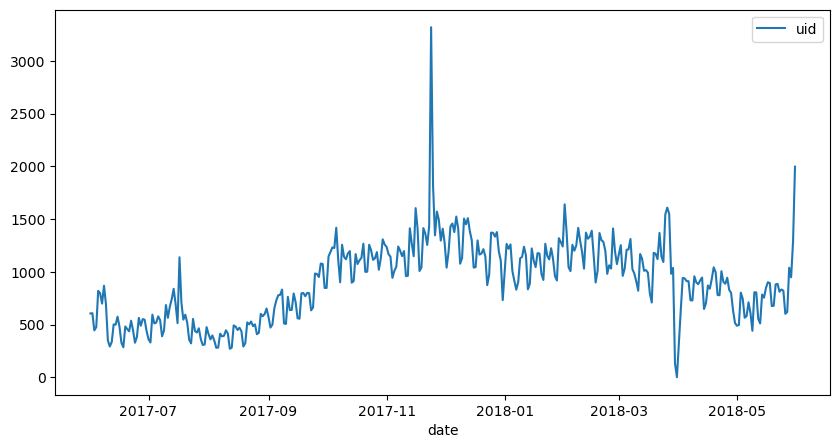

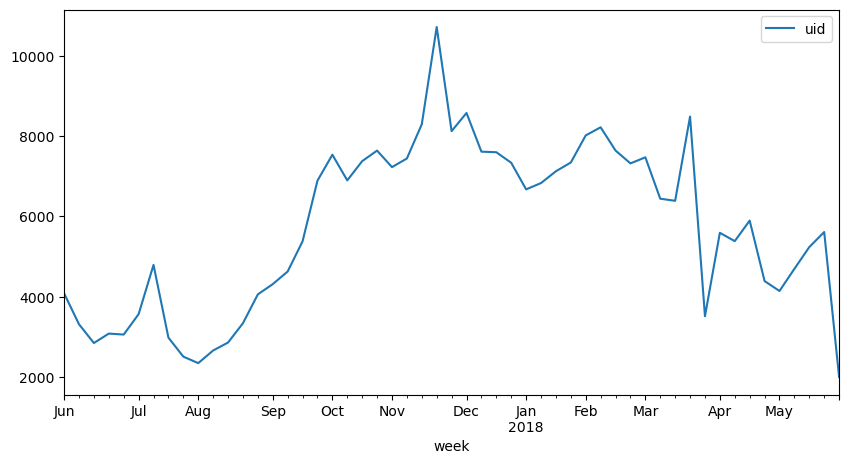

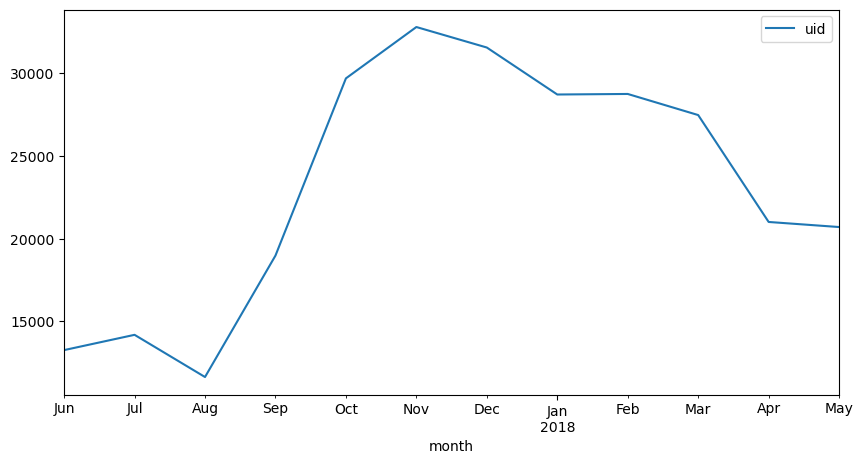

In [29]:
#graficando el dau, wau y mau
dau.plot(figsize=(10,5))
wau.plot(figsize=(10,5))
mau.plot(figsize=(10,5))

### ¿Cuántas sesiones hay por día?

In [30]:
#calculando las sesiones diarias promedio
daily_sessions = visits.groupby("date").agg({"uid" : "count"})
print("Las sesiones diarias promedio son:", daily_sessions["uid"].mean())

Las sesiones diarias promedio son: 987.3626373626373


<AxesSubplot:xlabel='date'>

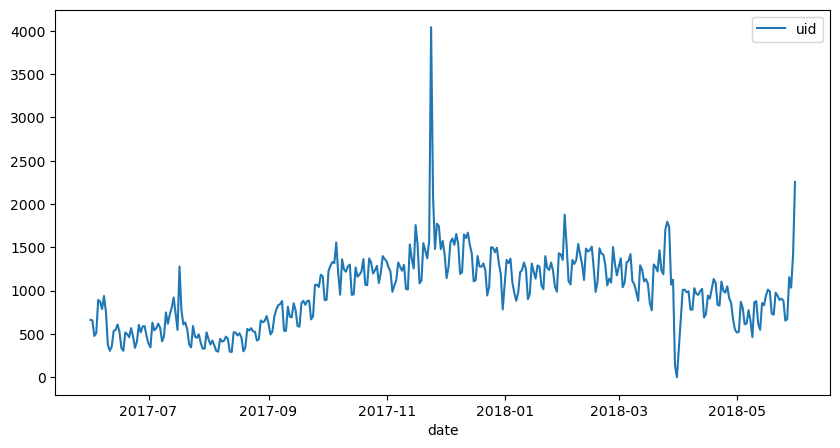

In [31]:
daily_sessions.plot(figsize=(10,5))

El promedio de sesiones diarias es mayor que el de usuarios diarios que usan el producto, ya que un usuario puede usarlo varias veces en un día.

In [32]:
#comprobando la afirmación anterior
unique_vs_sessions = visits.groupby("date").agg({"uid" : ["count", "nunique"]})
unique_vs_sessions.head()

uid        
           count nunique
date                    
2017-06-01   664     605
2017-06-02   658     608
2017-06-03   477     445
2017-06-04   510     476
2017-06-05   893     820

<AxesSubplot:xlabel='date'>

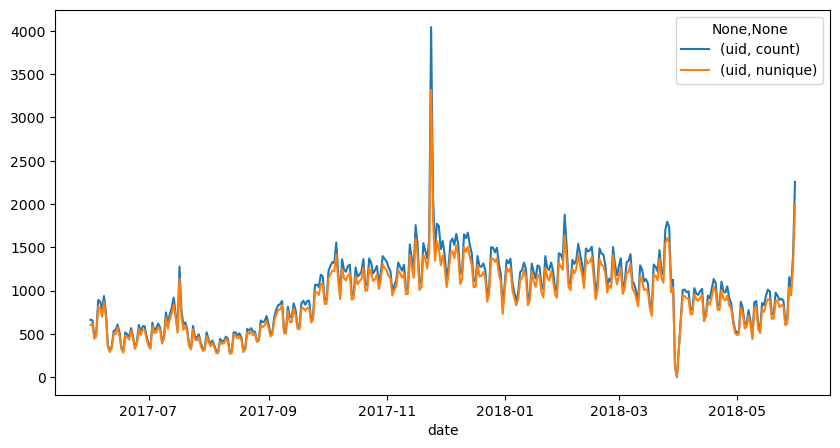

In [33]:
#graficando ambas variables
unique_vs_sessions.plot(figsize=(10,5))

In [34]:
#calculando las sesiones por usuario
unique_vs_sessions.columns = ["count", "nunique"]
unique_vs_sessions["sessions_per_user"] = unique_vs_sessions["count"]/unique_vs_sessions["nunique"]
unique_vs_sessions.head()

,count,nunique,sessions_per_user
date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


<AxesSubplot:xlabel='date'>

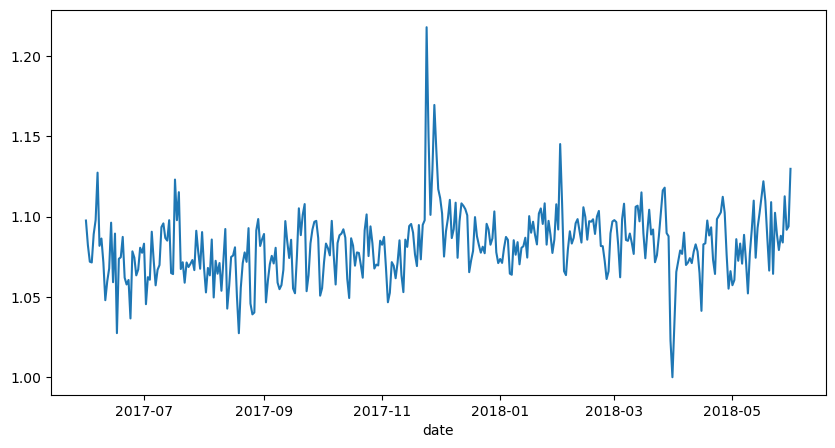

In [35]:
#graficando ambas variables
unique_vs_sessions["sessions_per_user"].plot(figsize=(10,5))

In [36]:
#calculando el promedio de las sesiones por usuario
unique_vs_sessions["sessions_per_user"].mean()

1.0821696440039723

### ¿Cuál es la duración de cada sesión?

In [37]:
#calculando la duración de cada sesión
visits["duration"] = (visits["end_ts"] - visits["start_ts"]).dt.seconds
visits.head()

,device,end_ts,source_id,start_ts,uid,month,week,date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0


In [38]:
#obteniendo mayor descripción de la columna
visits["duration"].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

<AxesSubplot:ylabel='Frequency'>

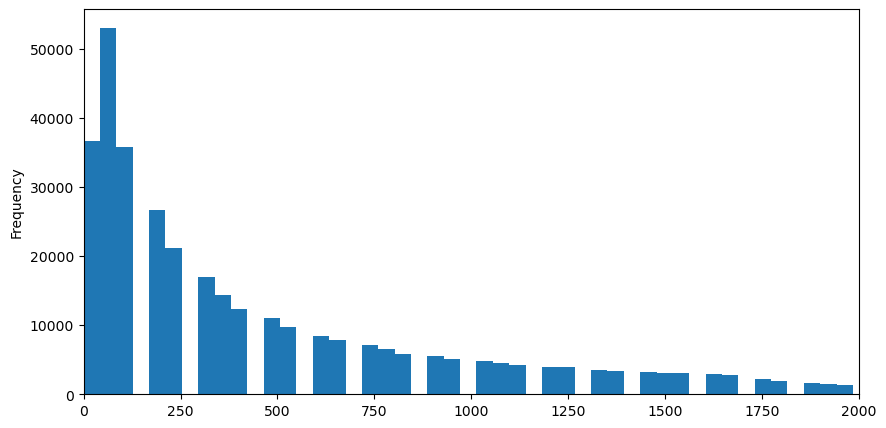

In [39]:
#graficando la duración de cada sesión
visits["duration"].plot(kind="hist", figsize=(10,5), bins=2000, xlim=(0,2000))

In [40]:
#calculando la media, mediana y moda de la duración de cada sesión
print(visits["duration"].mean())
print(visits["duration"].median())
print(visits["duration"].mode())

643.506488592098
300.0
0    60
Name: duration, dtype: int64


En promedio los usuarios están 643.5 segundos por sesión, pero la mediana es 300 y esto se debe a que la moda de los datos es 0 segundos, por esto, la duración está sesgada hacia la derecha.

### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [41]:
#agrupando por usuario para encontrar su primer mes
first_month = visits.groupby("uid").agg({"month" : "min"}).reset_index().rename(columns={"month" : "first_month"})
first_month

,uid,first_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01
...,...,...
228164,18446403737806311543,2017-11-01
228165,18446424184725333426,2017-12-01
228166,18446556406699109058,2018-01-01
228167,18446621818809592527,2017-12-01


In [42]:
#agregando el primer mes al df original
visits_with_first_visit = visits.merge(first_month, on="uid", how="left")
visits_with_first_visit.head()

,device,end_ts,source_id,start_ts,uid,month,week,date,duration,first_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0,2017-12-01


In [43]:
#calculando la diferencia de la fecha de la sesión con la del primer mes
visits_with_first_visit["months_diff"] = visits_with_first_visit["month"].dt.month - visits_with_first_visit["first_month"].dt.month
visits_with_first_visit["months_diff"] += 12*(visits_with_first_visit["month"].dt.year - visits_with_first_visit["first_month"].dt.year)
visits_with_first_visit.head()

,device,end_ts,source_id,start_ts,uid,month,week,date,duration,first_month,months_diff
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0,2017-12-01,0


In [44]:
#creando la tabla con las cohortes
retention_table = visits_with_first_visit.pivot_table(index="first_month", columns="months_diff", values="uid", aggfunc="nunique").fillna(0)
retention_table

months_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,0.0
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,0.0,0.0
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,0.0,0.0,0.0
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,0.0,0.0,0.0,0.0
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,22197.0,1267.0,565.0,446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#calculando la retención mensual en cada cohorte
retention_rates = retention_table.copy()
for col in retention_rates.columns:
    retention_rates[col] = retention_table[col]/retention_table[0]

retention_rates.fillna(" ")

months_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,0.000000
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,0.000000,0.000000
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,0.000000,0.000000,0.000000
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.057080,0.025454,0.020093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:title={'center':'Cohortes: retención de usuarios/as'}, xlabel='months_diff', ylabel='first_month'>

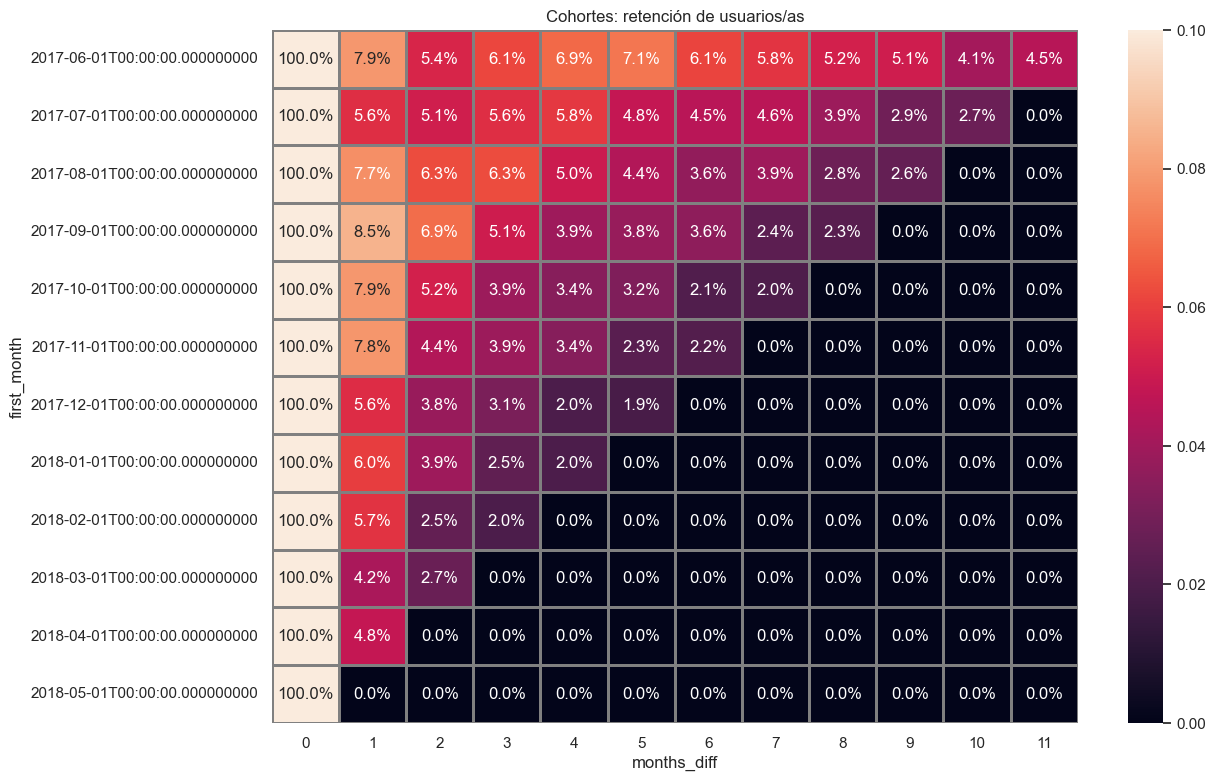

In [46]:
#graficando la retención de usuarios
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(
    retention_rates, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1
) 

Como se puede observar, la retención de usuarios es muy baja después del primer mes para cada cohorte

## VENTAS

### ¿Cuándo la gente empieza a comprar?

In [47]:
#calculando las primeras compras de cada usuario
first_orders = orders.groupby("uid").agg({"buy_ts" : "min"}).reset_index().rename(columns={"buy_ts" : "first_purchase"})
first_orders.head()

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [48]:
#calculando las primeras visitas de cada usuario
first_visits = visits.groupby("uid").agg({"start_ts" : "min"}).reset_index().rename(columns={"start_ts" : "first_visit"})
first_visits.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [49]:
#creando una tabla con las primeras visitas y las primeras compras
first_visits_with_first_purchases = first_visits.merge(first_orders, on="uid", how="right")
first_visits_with_first_purchases.head()

,uid,first_visit,first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [50]:
#verificando que no haya elementos nulos
first_visits_with_first_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             36523 non-null  uint64        
 1   first_visit     36523 non-null  datetime64[ns]
 2   first_purchase  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 1.1 MB


In [51]:
#calculando el tiempo que se demoraron en hacer la primera compra
first_visits_with_first_purchases["time_to_first_purchase"] = first_visits_with_first_purchases["first_purchase"] - first_visits_with_first_purchases["first_visit"]
first_visits_with_first_purchases

,uid,first_visit,first_purchase,time_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00
...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,95 days 19:33:00
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,0 days 00:07:00
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,231 days 11:03:00
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,103 days 09:33:00


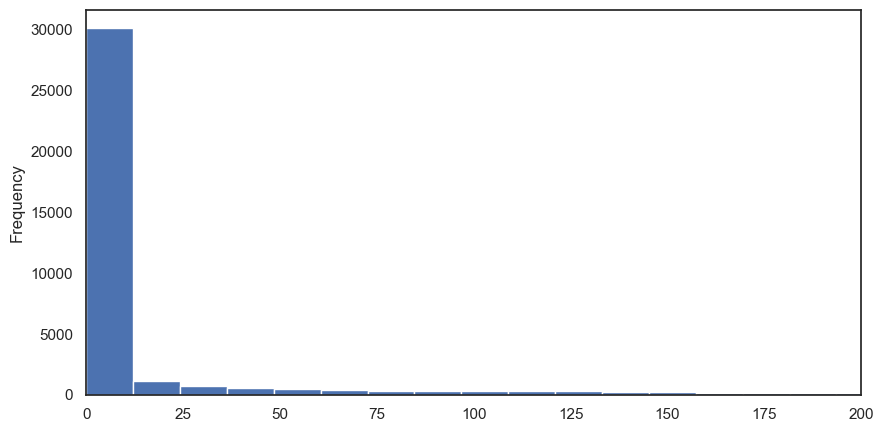

In [52]:
#graficando los días que se demoran en hacer la primera compra
first_visits_with_first_purchases["days_to_first_purchase"] = first_visits_with_first_purchases["time_to_first_purchase"].dt.days
first_visits_with_first_purchases["days_to_first_purchase"].plot(kind="hist", figsize =(10,5), bins=30, xlim=(0,200))
plt.show()

In [53]:
#obteniendo las métricas de la columna
first_visits_with_first_purchases["time_to_first_purchase"].describe()

count                         36523
mean     16 days 21:40:10.550064343
std      47 days 01:44:46.481416776
min                 0 days 00:00:00
25%                 0 days 00:04:00
50%                 0 days 00:16:00
75%                 2 days 00:17:00
max               363 days 07:04:00
Name: time_to_first_purchase, dtype: object

El 50% de los usuarios hacen su primera compra el mismo día de su primera visita, el 75% de los usuarios hacen su primera compra en menos de dos días, y el que más se ha demorado en comprar fue a los 363 días. 

En general se puede decir que los clientes realizan rápidamente su primera compra.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [54]:
#creando una columna que contenga la semana de la compra
orders["week"] = orders["buy_ts"].astype("datetime64[W]")
orders.head()

,buy_ts,revenue,uid,week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [55]:
#agrupando por semana para contabilizar
weekly_purchases = orders.groupby("week").agg({"uid":"count"}).rename(columns={"uid":"purchases"}).reset_index()
weekly_purchases.head()

,week,purchases
0,2017-06-01,896
1,2017-06-08,525
2,2017-06-15,341
3,2017-06-22,441
4,2017-06-29,461


In [56]:
#obteniendo métricas de la columna
weekly_purchases["purchases"].describe()

count      53.000000
mean      951.226415
std       405.229880
min       319.000000
25%       631.000000
50%       972.000000
75%      1214.000000
max      2120.000000
Name: purchases, dtype: float64

<AxesSubplot:xlabel='week'>

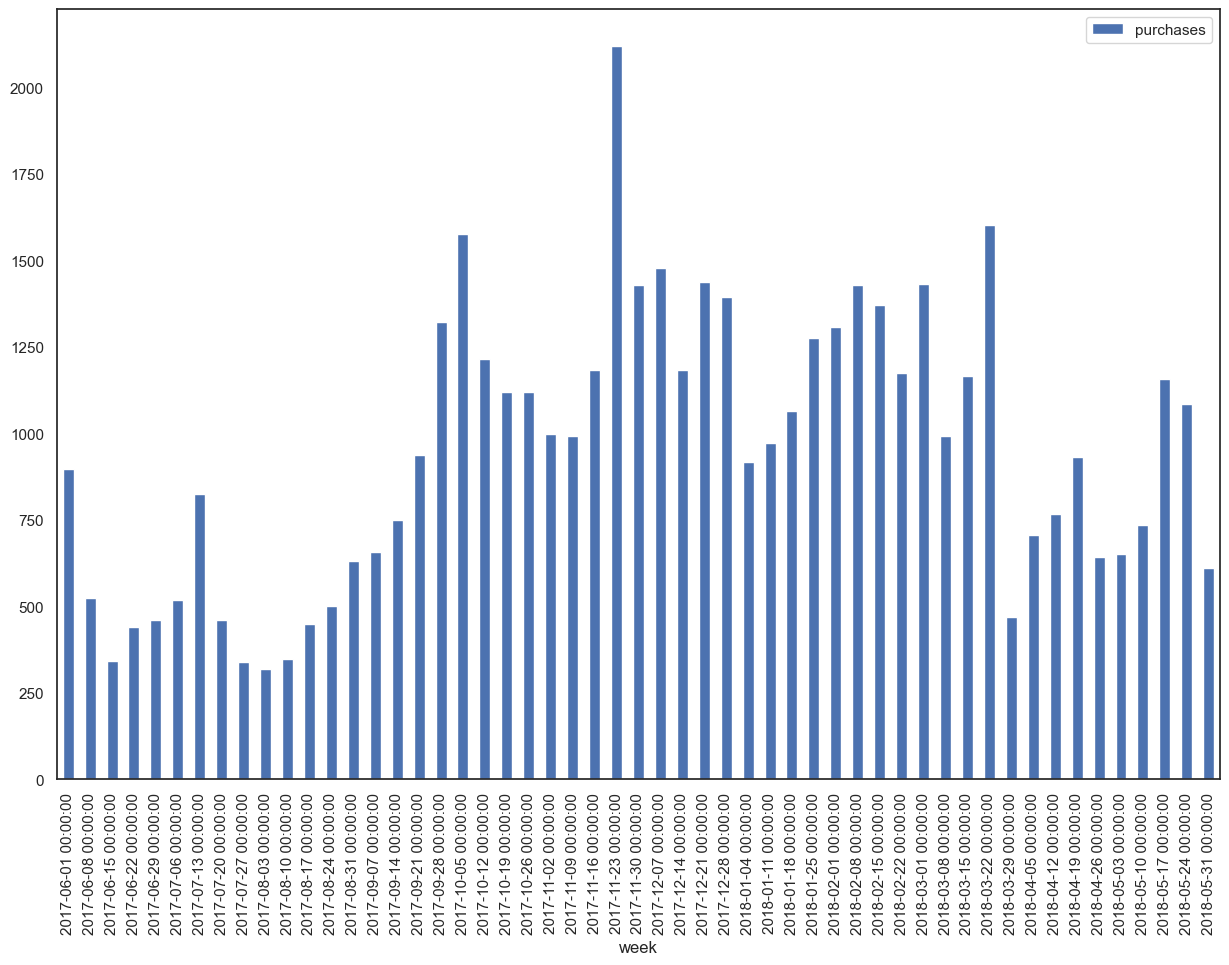

In [57]:
#graficando las compras semanales
weekly_purchases.plot(x="week", y="purchases", kind="bar", figsize=(15,10))

La cantidad de pedidos semanales varían entre 319 y 2120, con un promedio de 951 compras.

### ¿Cuál es el tamaño promedio de compra?

In [58]:
orders

,buy_ts,revenue,uid,week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31


In [59]:
#creando tabla para calcular el tamaño promedio de las compras semanales
avg_weekly_purchases = orders.groupby("week").agg({"uid":"count", "revenue":"sum"}).rename(columns={"uid":"total_purchases"}).reset_index()
avg_weekly_purchases.head()

,week,total_purchases,revenue
0,2017-06-01,896,2546.66
1,2017-06-08,525,2536.51
2,2017-06-15,341,1527.33
3,2017-06-22,441,2099.22
4,2017-06-29,461,2449.82


In [60]:
#calculando el promedio de las compras semanales
avg_weekly_purchases["avg_revenue"] = avg_weekly_purchases["revenue"] / avg_weekly_purchases["total_purchases"]
avg_weekly_purchases.head()

,week,total_purchases,revenue,avg_revenue
0,2017-06-01,896,2546.66,2.842254
1,2017-06-08,525,2536.51,4.831448
2,2017-06-15,341,1527.33,4.478974
3,2017-06-22,441,2099.22,4.760136
4,2017-06-29,461,2449.82,5.314143


In [61]:
#calculando métricas para la columna del tamaño de la compra semanañ
avg_weekly_purchases["avg_revenue"].describe()

count    53.000000
mean      4.995856
std       0.967166
min       2.842254
25%       4.342249
50%       4.831448
75%       5.343722
max       7.557021
Name: avg_revenue, dtype: float64

<AxesSubplot:>

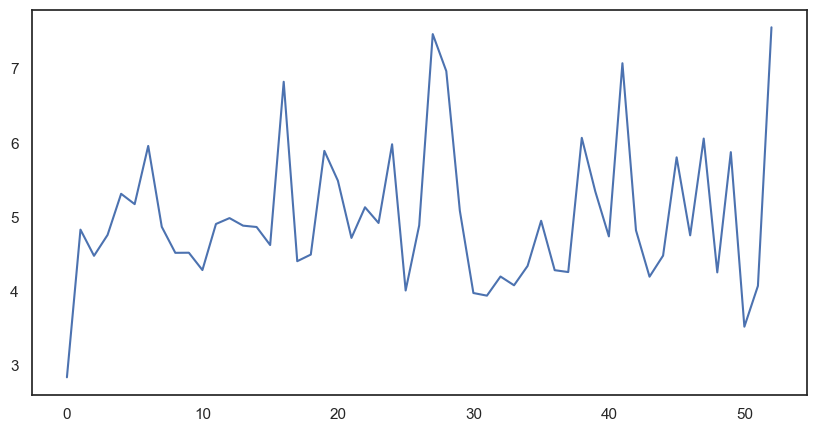

In [62]:
#graficando el revenue promedio por compra
avg_weekly_purchases["avg_revenue"].plot(kind="line", figsize=(10,5))

El revenue por compra va desde los 2.84 a 7.55, con una media de 4.99.

### ¿Cuánto dinero traen? (LTV)

In [63]:
#pasando la columna "Buy Ts" a datetime
orders["month"] = orders["buy_ts"].astype("datetime64[M]")
orders.head()

,buy_ts,revenue,uid,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [64]:
#obteniendo la semana de la primera compra de cada usuario
first_orders = orders.groupby("uid").agg({"month" : "min"}).reset_index().rename(columns={"month" : "first_order_month"})
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [65]:
#uniendo tablas
orders_ = orders.merge(first_orders, on="uid")
orders_.head()

,buy_ts,revenue,uid,week,month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [66]:
#calculando la diferencia entre el mes de la compra y el mes de la primera compra
orders_["months_diff"] = orders_["month"].dt.month - orders_["first_order_month"].dt.month
orders_["months_diff"] += 12*(orders_["month"].dt.year - orders_["first_order_month"].dt.year)
orders_.head()

,buy_ts,revenue,uid,week,month,first_order_month,months_diff
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0


In [67]:
#agrupando por usuario, mes de primera compra y mes de la compra para ver el revenue
purchase_by_user_by_month = orders_.groupby(["uid", "first_order_month", "months_diff"]).agg({"revenue":"sum"}).reset_index().sort_values(by=["uid","months_diff"])
purchase_by_user_by_month.head()

,uid,first_order_month,months_diff,revenue
0,313578113262317,2018-01-01,0,0.55
1,1575281904278712,2017-06-01,0,3.05
2,2429014661409475,2017-10-01,0,73.33
3,2464366381792757,2018-01-01,0,2.44
4,2551852515556206,2017-11-01,0,10.99


In [68]:
#creando la tabla dinámica de el df anterior
purchase_table = purchase_by_user_by_month.pivot_table(index="first_order_month", columns="months_diff", values="revenue", aggfunc="mean")
purchase_table

months_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139062,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#calculando el dinero que traen los usuarios después de 3 meses desde que hacen la primera compra
purchase_mean = purchase_table[3].mean()
retention_mean = retention_rates[3].mean()
ltv = purchase_mean / (1-retention_mean)
print(ltv)

32.55546353426027


## Marketing

### ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

In [70]:
#observando la df costs
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [71]:
#calculando el costo total
costs["costs"].sum()

329131.62

In [72]:
#calculando el costo por fuente
costs_by_source = costs.groupby(["source_id"]).agg({"costs":"sum"}).reset_index()
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

In [73]:
#creando la columna de mes en el df de costs
costs["month"] = costs["dt"].astype("datetime64[M]")
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [74]:
#calculando el CAC promedio mensual
monthly_cac = costs.groupby(["month"]).agg({"costs":"sum", "source_id":"count"}).reset_index().rename(columns={"source_id":"count"}).set_index("month")
monthly_cac["cac"] = monthly_cac["costs"] / monthly_cac["count"]
monthly_cac

,costs,count,cac
month,,,
2017-06-01,18015.00,210,85.785714
2017-07-01,18240.59,217,84.058018
2017-08-01,14790.54,217,68.159171
2017-09-01,24368.91,210,116.042429
2017-10-01,36322.88,217,167.386544
2017-11-01,37907.88,210,180.513714
2017-12-01,38315.35,217,176.568433
2018-01-01,33518.52,217,154.463226
2018-02-01,32723.03,196,166.954235


<AxesSubplot:xlabel='month'>

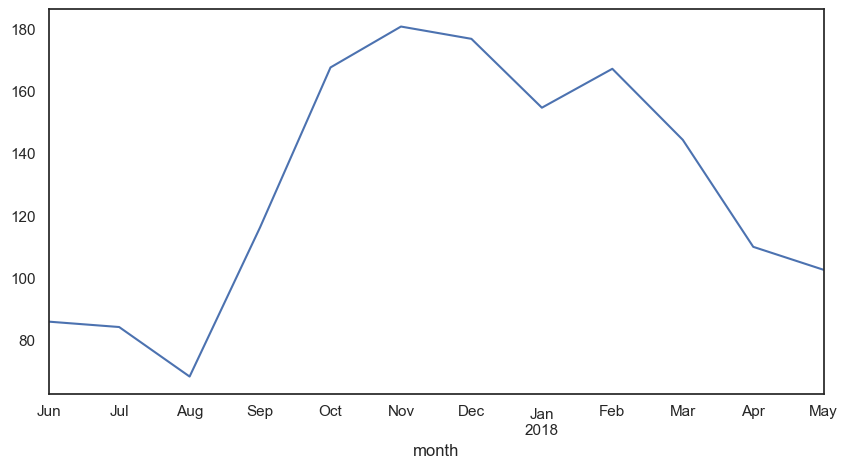

In [75]:
#graficando el costo de adquisición de clientes mensual
monthly_cac["cac"].plot(kind="line", figsize=(10,5))

In [76]:
#calculando cuanto se gastó en marketing mensualmente
marketing = costs.groupby(["source_id", "month"]).agg({"costs":"sum"}).reset_index()
marketing

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [77]:
#extrayendo el source que utilizó cada usuario
source_by_visits = visits.groupby("uid")["source_id"].nunique().reset_index()
source_by_visits.head()

,uid,source_id
0,11863502262781,1
1,49537067089222,1
2,297729379853735,1
3,313578113262317,1
4,325320750514679,1


In [78]:
#observando el df first_month
first_month.head()

,uid,first_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


In [79]:
#uniendo ambos df
source_by_user_first_month = source_by_visits.merge(first_month, on="uid")
source_by_user_first_month.head()

,uid,source_id,first_month
0,11863502262781,1,2018-03-01
1,49537067089222,1,2018-02-01
2,297729379853735,1,2017-06-01
3,313578113262317,1,2017-09-01
4,325320750514679,1,2017-09-01


In [80]:
#calculando cuantos nuevos usuarios hubo mensualmente
visits_per_month_per_source = source_by_user_first_month.groupby(["source_id", "first_month"])["uid"].nunique().reset_index().rename(columns={"first_month":"month","uid":"total_users"})
visits_per_month_per_source

,source_id,month,total_users
0,1,2017-06-01,9672
1,1,2017-07-01,9990
2,1,2017-08-01,7928
3,1,2017-09-01,13018
4,1,2017-10-01,20817
...,...,...,...
67,6,2018-02-01,2
68,6,2018-03-01,1
69,7,2017-06-01,6
70,7,2017-08-01,1


In [81]:
#combinando ambos df 
cac_table = marketing.merge(visits_per_month_per_source, on=["source_id", "month"], how="outer")
cac_table = cac_table.dropna()
cac_table.head()

,source_id,month,costs,total_users
0,1,2017-06-01,1125.61,9672.0
1,1,2017-07-01,1072.88,9990.0
2,1,2017-08-01,951.81,7928.0
3,1,2017-09-01,1502.01,13018.0
4,1,2017-10-01,2315.75,20817.0


In [82]:
#creando la columna cac por fuente y por mes
cac_table["cac"] = cac_table["costs"]/cac_table["total_users"]
cac_table.head()

,source_id,month,costs,total_users,cac
0,1,2017-06-01,1125.61,9672.0,0.116378
1,1,2017-07-01,1072.88,9990.0,0.107395
2,1,2017-08-01,951.81,7928.0,0.120057
3,1,2017-09-01,1502.01,13018.0,0.115379
4,1,2017-10-01,2315.75,20817.0,0.111243


<AxesSubplot:xlabel='month', ylabel='cac'>

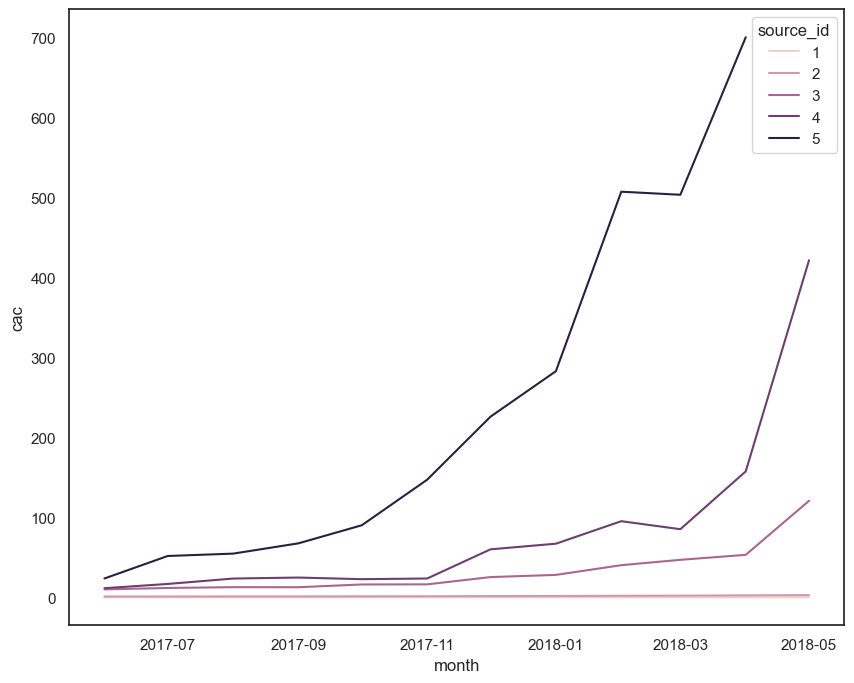

In [83]:
#graficando el cac de las distintas fuentes 
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x="month", y="cac",
             hue="source_id", data=cac_table
            )

Las fuentes 1, 2 y 3 son las con menor cac, es decir tienen un menor costo de adquisición de clientes a través de los meses. Por el contrario, la fuente 4 y 5 tienen un costo de adquisición de clientes bastante elevado a partir de octubre-noviembre.

### ¿Cuán rentables eran las inversiones? (ROI)

In [84]:
#uniendo los df para obtener el source_id para cada usuario
purchase_by_user_month_source = purchase_by_user_by_month.merge(source_by_visits, on="uid", how="left")
purchase_by_user_month_source

,uid,first_order_month,months_diff,revenue,source_id
0,313578113262317,2018-01-01,0,0.55,1
1,1575281904278712,2017-06-01,0,3.05,1
2,2429014661409475,2017-10-01,0,73.33,1
3,2464366381792757,2018-01-01,0,2.44,1
4,2551852515556206,2017-11-01,0,10.99,1
...,...,...,...,...,...
41014,18445147675727495770,2017-11-01,0,3.05,1
41015,18445407535914413204,2017-09-01,0,0.88,2
41016,18445601152732270159,2018-03-01,0,4.22,2
41017,18446156210226471712,2018-02-01,0,9.78,4


In [85]:
#agrupando para ver el revenue por fuente
revenue_by_source = purchase_by_user_month_source.groupby("source_id").agg({"revenue":"sum", "uid":"nunique"}).reset_index().rename(columns={"uid":"n_buyers"})
revenue_by_source

,source_id,revenue,n_buyers
0,1,98724.56,22441
1,2,66168.56,9347
2,3,30065.66,3270
3,4,18180.00,1079
4,5,35459.94,321
5,6,2676.61,56
6,7,781.87,9


In [86]:
#calculando el revenue por usuario
revenue_by_source["revenue_per_user"] = revenue_by_source["revenue"] / revenue_by_source["n_buyers"]
revenue_by_source

,source_id,revenue,n_buyers,revenue_per_user
0,1,98724.56,22441,4.399294
1,2,66168.56,9347,7.079123
2,3,30065.66,3270,9.194391
3,4,18180.00,1079,16.848934
4,5,35459.94,321,110.467103
5,6,2676.61,56,47.796607
6,7,781.87,9,86.874444


In [87]:
#creando la tabla para calcular el roi
roi = revenue_by_source.merge(cac_table, on="source_id")
roi.head()

,source_id,revenue,n_buyers,revenue_per_user,month,costs,total_users,cac
0,1,98724.56,22441,4.399294,2017-06-01,1125.61,9672.0,0.116378
1,1,98724.56,22441,4.399294,2017-07-01,1072.88,9990.0,0.107395
2,1,98724.56,22441,4.399294,2017-08-01,951.81,7928.0,0.120057
3,1,98724.56,22441,4.399294,2017-09-01,1502.01,13018.0,0.115379
4,1,98724.56,22441,4.399294,2017-10-01,2315.75,20817.0,0.111243


In [88]:
#calculando el roi
roi["roi"] = roi["revenue_per_user"] / roi["cac"]
roi

,source_id,revenue,n_buyers,revenue_per_user,month,costs,total_users,cac,roi
0,1,98724.56,22441,4.399294,2017-06-01,1125.61,9672.0,0.116378,37.801701
1,1,98724.56,22441,4.399294,2017-07-01,1072.88,9990.0,0.107395,40.963527
2,1,98724.56,22441,4.399294,2017-08-01,951.81,7928.0,0.120057,36.643452
3,1,98724.56,22441,4.399294,2017-09-01,1502.01,13018.0,0.115379,38.128915
4,1,98724.56,22441,4.399294,2017-10-01,2315.75,20817.0,0.111243,39.546629
5,1,98724.56,22441,4.399294,2017-11-01,2445.16,21986.0,0.111214,39.556872
6,1,98724.56,22441,4.399294,2017-12-01,2341.20,21288.0,0.109977,40.001783
7,1,98724.56,22441,4.399294,2018-01-01,2186.18,19453.0,0.112383,39.145665
8,1,98724.56,22441,4.399294,2018-02-01,2204.48,19464.0,0.113259,38.842657
9,1,98724.56,22441,4.399294,2018-03-01,1893.09,18341.0,0.103216,42.622091


En la fuente 1 es rentable, pero en las demás no, y también se puede ver que en las fuentes 6 y 7 aun que no hayan hecho inversión en marketing si hay un ingreso.

# CONCLUSIÓN

Tras hacer los cálculos para obtener cuantos ingresos hay por cada fuente y cuantos gastos se hacen, se puede concluir que en la fuente 1 si es rentable hacer inversiones en marketing. Por otro lado, la fuente 2, 3, 4 y 5 muestra ingresos deficientes a pesar del gran gasto en marketing que se realiza. Mi consejo es invertir más en las fuentes 6 y 7 ya que sin hacer inversión consiguen tener ingresos, entonces si se invierte en marketing para esas dos fuentes los ingresos debiesen ser aún mayores, también se puede invertir más en la fuente 1. 